<a href="https://colab.research.google.com/github/josep29/josep29/blob/main/Flowers_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudi d'algoritmes de classificació

Activitat realitzada per:

* Josep Picanyol

En aquesta activitat, adjunta al projecte TDR és per veure com funcionen els diferents models de classifiació, així veient amb el tipus de dades que tenim, quin és el tipus de model que millor s'adapta.

Podem veure que per aquest programa s'utilitzarà una llibreria de fotografies de flors, simulant els elements d'una vida quotidiana.

El dataset de imatges es pot descarregar aquí:

[flower_photos](https://rserve.dataverse.harvard.edu/cgi-bin/zipdownload?7ba-7d4b030141c1) (~800Mb)

In [ ]:
@data{DVN/1ECTVN_2020,
author = {Tung, K},
publisher = {Harvard Dataverse},
title = {{Flowers Dataset}},
UNF = {UNF:6:z6JGwpi2tftxFU+tbVH/3g==},
year = {2020},
version = {V8},
doi = {10.7910/DVN/1ECTVN},
url = {https://doi.org/10.7910/DVN/1ECTVN}
}


### Importació de llibreries utilitzades en el programa:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import PIL 
import pathlib 
import random
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

### Importació de les dades per grups

In [ ]:
!mkdir zipfiles

In [ ]:
!unzip gdrive/My\ Drive/Colab_Notebooks/Data/dataverse_files.zip -d zipfiles/

In [ ]:
!unzip  /content/zipfiles/flowers.zip

In [ ]:
!mv /content/flowers/flower_photos/test /content/flowers/flower_photos/train /content/flowers/flower_photos/validation -t /content/
!rm -rf zipfiles/ __MACOSX/ flowers/ sample_data/ flower_photos/

### Importació del les dades totals

In [ ]:
!unzip gdrive/My\ Drive/Colab_Notebooks/Data/flower_photos.zip 

a

In [ ]:
!cp -av /content/flower_photos/ /content/flower_photos1/

os.mkdir('/content/flower_photos1/daisy1/')
os.mkdir('/content/flower_photos1/dandelion1/')
os.mkdir('/content/flower_photos1/roses1/')
os.mkdir('/content/flower_photos1/sunflowers1/')
os.mkdir('/content/flower_photos1/tulips1/')

!mv /content/flower_photos1/daisy/ -t /content/flower_photos1/daisy1/
!mv /content/flower_photos1/dandelion/ -t /content/flower_photos1/dandelion1/
!mv /content/flower_photos1/roses/ -t /content/flower_photos1/roses1/
!mv /content/flower_photos1/sunflowers/ -t /content/flower_photos1/sunflowers1/
!mv /content/flower_photos1/tulips/ -t /content/flower_photos1/tulips1/

### Creem els directroris

In [ ]:
data_dir = '/content/flower_photos/'
data_dir = pathlib.Path(data_dir)

train_dir = '/content/train/'
train_dir = pathlib.Path(train_dir)
test_dir = '/content/test/'
test_dir = pathlib.Path(test_dir)
val_dir = '/content/validation/'
val_dir = pathlib.Path(val_dir)

daisy_dir = '/content/flower_photos1/daisy1'
daisy_dir = pathlib.Path(daisy_dir)
dandelion_dir = '/content/flower_photos1/dandelion1'
dandelion_dir = pathlib.Path(dandelion_dir)
roses_dir = '/content/flower_photos1/roses1'
roses_dir = pathlib.Path(roses_dir)
sunflowers_dir = '/content/flower_photos1/sunflowers1'
sunflowers_dir = pathlib.Path(sunflowers_dir)
tulips_dir = '/content/flower_photos1/tulips1'
tulips_dir = pathlib.Path(tulips_dir)

In [ ]:
class GetData:
  def __init__(self, type, dir, shape=(32,64,64), n=random.randrange(0,100)):
    self.type = type
    self.dir = dir
    self.Data = list(self.dir.glob(type))
    self.shape = shape
    self.n = n
  
  def printData(self):
    print(f"L'indicador de la foto és: {self.n}")
    return PIL.Image.open(str(self.Data[self.n]))
  
  def resizeData(self):
    finalsize = 64
    if self.type == 'daisy/*':
      t = 633
    for x in t:
      self.n = x
      img = GetData(self.type, self.dir, self.n).printData()
      wpercent = (float(img.size[0])/finalsize)
      hpercent = (float(img.size[1])/finalsize)
      wsize = int((float(img.size[0])*float(wpercent)))
      hsize = int((float(img.size[1])*float(hpercent)))
      img = img.resize((wsize,hsize), PIL.Image.ANTIALIAS)
      img.save(str(self.Data[self.n]))

  def data_augmentation(self, shape):
    pass

In [ ]:
GetData('daisy/*', daisy_dir).resizeData()

In [ ]:
def data_count(dir):
  count = len(list(dir.glob('*/*.jpg')))
  return count

daisy_count = data_count(daisy_dir)
dandelion_count = data_count(dandelion_dir)
roses_count = data_count(roses_dir)
sunflowers_count = data_count(sunflowers_dir)
tulips_count = data_count(tulips_dir)

In [ ]:
data_count = data_count(data_dir)

print(f'El total de les dades és de {data_count}')
print(f'El total de les dades daisy és de {daisy_count}')
print(f'El total de les dades dandelion és de {dandelion_count}')
print(f'El total de les dades roses és de {roses_count}')
print(f'El total de les dades sunflowers és de {sunflowers_count}')
print(f'El total de les dades tulips és de {tulips_count}')

El total de les dades és de 3670
El total de les dades daisy és de 633
El total de les dades dandelion és de 898
El total de les dades roses és de 641
El total de les dades sunflowers és de 699
El total de les dades tulips és de 799


In [ ]:
class_names = {
    0:'daisy', 1:'dandelion', 2:'roses', 3:'sunflowers', 4:'tulips'
}

L'indicador de la foto és: 61


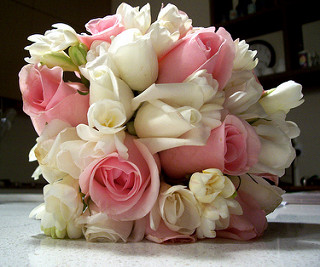

In [ ]:
roses_train = GetData('roses/*', data_dir).Data
GetData('roses/*', data_dir).printData()

L'indicador de la foto és: 61


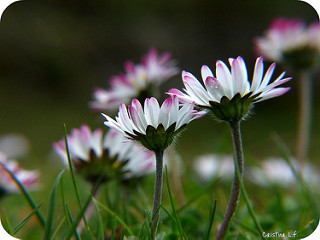

In [ ]:
daisy = GetData('daisy/*', data_dir).Data
GetData('daisy/*', data_dir).printData()

L'indicador de la foto és: 80


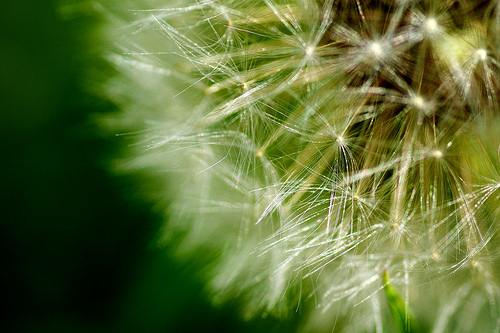

In [ ]:
dandelion = GetData('dandelion/*', data_dir).Data
GetData('dandelion/*', data_dir).printData()

L'indicador de la foto és: 58


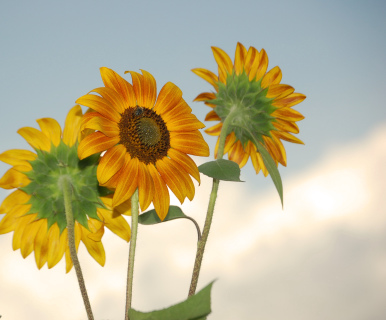

In [ ]:
sunflowers = GetData('sunflowers/*', data_dir).Data
GetData('sunflowers/*', data_dir).printData()

L'indicador de la foto és: 1


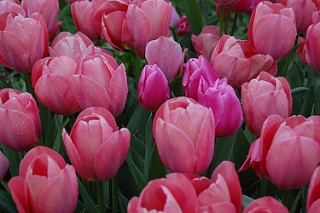

In [ ]:
tulips = GetData('tulips/*', data_dir).Data
GetData('tulips/*', data_dir).printData()

In [ ]:
batch_size=32
image_size=(64, 64)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels=None,
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    seed=123,
    validation_split=0.15,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3670 files belonging to 1 classes.
Using 3120 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels=None,
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    seed=123,
    validation_split=0.15,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3670 files belonging to 1 classes.
Using 550 files for validation.
